In [95]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import accuracy_score , confusion_matrix , r2_score

from sklearn.model_selection import train_test_split


In [96]:
df = pd.read_csv("titanic/train.csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.475,C83,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.900,NaN,S
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.500,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.250,NaN,S


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
df = df.drop(columns= ['PassengerId' , 'Ticket' , 'Cabin' , "Name"])

In [100]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [102]:
# Tranforminng tht columns 
si_mean = SimpleImputer(strategy='mean')
si_median = SimpleImputer(strategy= 'most_frequent')
ohe = OneHotEncoder(drop= "first" , sparse_output=False , dtype= np.int64)

ct = ColumnTransformer([
    ("trf1", ohe, ['Sex']),  
    ("ct2", si_mean, ["Age"]), 
    ("ct3", Pipeline([
        ('si', si_median),  
        ('ohe', ohe) 
    ]), ['Embarked'])
], remainder="passthrough")


In [103]:
# train test split
y = df['Survived']
X = df.drop(columns= ['Survived'])

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state=2)

In [104]:
# Column Tranformation
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [105]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
# model Traning (Linar regrssion)
lr = LinearRegression()

lr.fit(X_train , y_train)

y_pred = lr.predict(X_test)

In [107]:
print("Accuracy Score : " , r2_score(y_test , y_pred))

Accuracy Score :  0.32649744751522236


In [108]:
# Model Traning (Logistic regression)
logr = LogisticRegression(solver= 'lbfgs')

logr.fit(X_train , y_train)
y_pred = logr.predict(X_test)

In [109]:
print("Accuracy Score : " , accuracy_score(y_test , y_pred))

Accuracy Score :  0.7877094972067039


<Axes: >

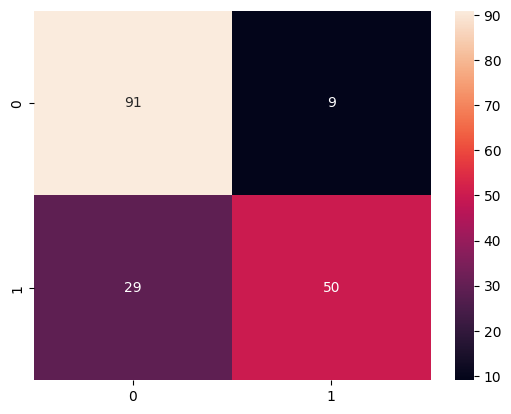

In [110]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test , y_pred) , annot= True)

In [114]:
from sklearn.ensemble import RandomForestClassifier
sv = RandomForestClassifier()
sv.fit(X_train , y_train)
y_pred = sv.predict(X_test)
print("Accuracy Score : " , accuracy_score(y_test , y_pred))

Accuracy Score :  0.8044692737430168


<Axes: >

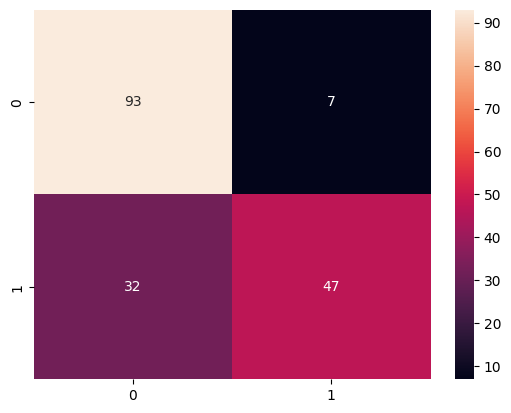

In [116]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test , y_pred) , annot= True)